MultiRAT dataset description code
================
Joanes Grandjean

![rat art](../assets/img/rat_art.png)

This page shows the code to reproduce the figures in the manuscript in preparation. Results/figure selection is based on the analysis in the other scripts.  

In [1]:
# init variables
init_folder='/home/traaffneu/joagra/code/MultiRat'
analysis_folder='/project/4180000.19/multiRat'
df_path='../assets/table/meta_data_20211208.tsv'

import pandas as pd
df = pd.read_csv(df_path, sep='\t')
mm = (1/2.54)*10


# Figure 1. Dataset description.
a. Strain.  
b. Sex.   
c. Anesthesia.   
d. Field strength.   
e. Breathing rate as a function of anesthesia.  
f. Heart rate as a function of anesthesia.   
g. Repetition time as a function of sequence   
h. Echo time as a function of sequence.   

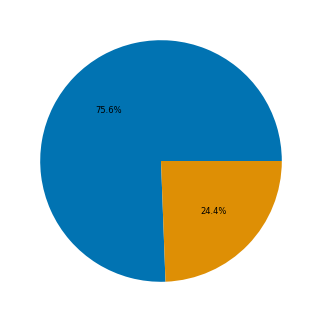

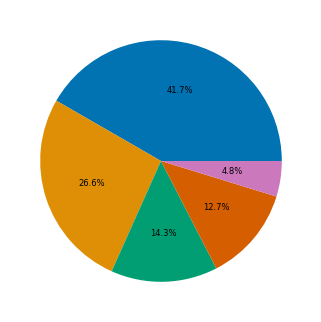

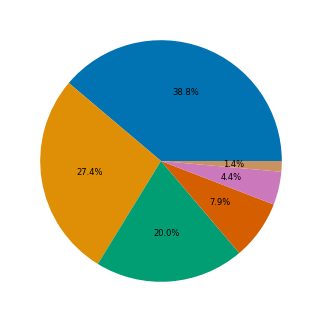

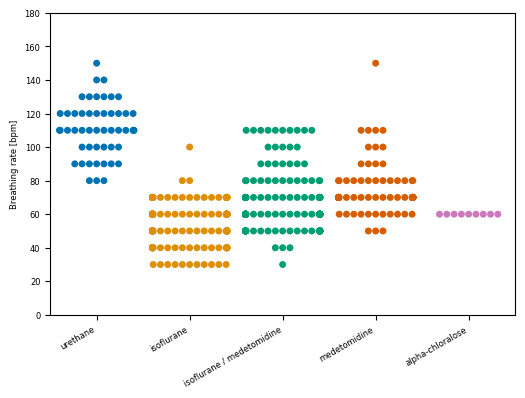

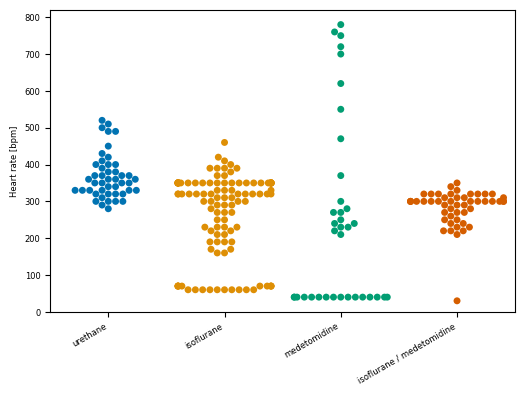

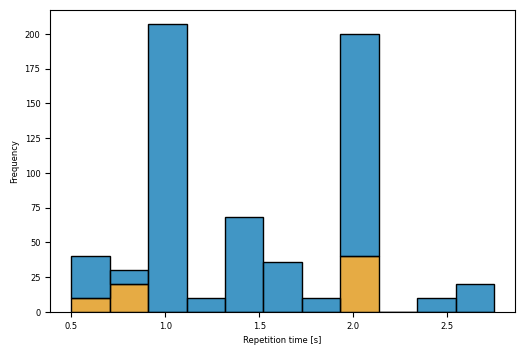

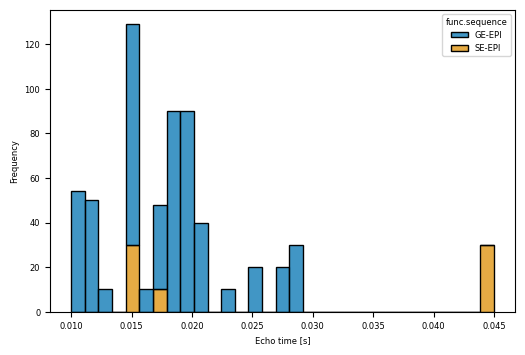

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("colorblind")

plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 6


## Figure 1A
plt.pie(df['rat.sex'].value_counts(), autopct="%.1f%%")
plt.savefig(os.path.join(init_folder,'assets','figure','Figure1A.svg'), format="svg", dpi=600)
plt.show()

## Figure 1B
plt.pie(df['rat.strain'].value_counts(), autopct="%.1f%%")
plt.savefig(os.path.join(init_folder,'assets','figure','Figure1B.svg'), format="svg", dpi=600)
plt.show()

## Figure 1C
plt.pie(df['anesthesia.maintenance'].value_counts(), autopct="%.1f%%")
plt.savefig(os.path.join(init_folder,'assets','figure','Figure1C.svg'), format="svg", dpi=600)
plt.show()

## Figure 1D
df_tmp = df.dropna(subset=['anesthesia.breathing.rate'])
snp = sns.swarmplot(x="anesthesia.maintenance", y="anesthesia.breathing.rate", data=df_tmp)
snp.set_xticklabels(snp.get_xticklabels(), rotation=30, ha='right')
snp.set_xlabel("")
snp.set_ylabel("Breathing rate [bpm]")
snp.set(ylim=(0, 180))

plt.savefig(os.path.join(init_folder,'assets','figure','Figure1D.svg'), format="svg", dpi=600)
plt.show()

## Figure 1E
df_tmp = df.dropna(subset=['anesthesia.heart.rate'])
snp = sns.swarmplot(x="anesthesia.maintenance", y="anesthesia.heart.rate", data=df_tmp)
snp.set_xticklabels(snp.get_xticklabels(), rotation=30, ha='right')
snp.set_xlabel("")
snp.set_ylabel("Heart rate [bpm]")
snp.set(ylim=(0, 820))

plt.savefig(os.path.join(init_folder,'assets','figure','Figure1E.svg'), format="svg", dpi=600)
plt.show()

## Figure 1F
snp = sns.histplot(data=df, x="func.TR", hue="func.sequence", multiple="stack")
snp.set_xlabel("Repetition time [s]")
snp.set_ylabel("Frequency")
snp.get_legend().remove()
plt.savefig(os.path.join(init_folder,'assets','figure','Figure1F.svg'), format="svg", dpi=600)
plt.show()

## Figure 1G
snp = sns.histplot(data=df, x="func.TE", hue="func.sequence", multiple="stack")
snp.set_xlabel("Echo time [s]")
snp.set_ylabel("Frequency")
plt.savefig(os.path.join(init_folder,'assets','figure','Figure1G.svg'), format="svg", dpi=600)
plt.show()


# Figure S1. Dataset description complement
a. Age in months   
b. Weight in g   


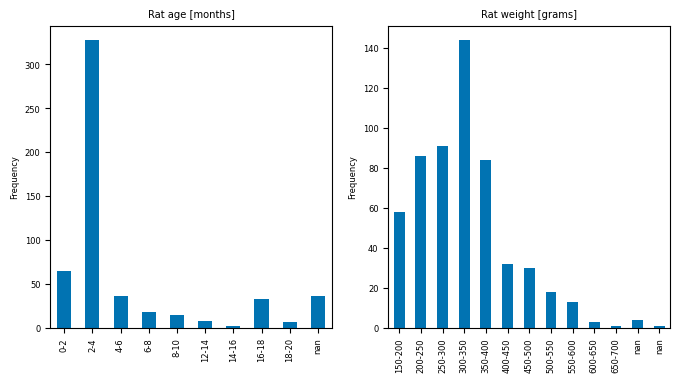

In [34]:
df_age= df['rat.age'].value_counts().rename_axis('age').reset_index(name='counts')
df_age['age'] = pd.Categorical(df_age['age'], ["0-2", "2-4", "4-6","6-8","8-10","10-12","12-14","14-16","16-18","18-20"])

df_weight= df['rat.weight'].value_counts().rename_axis('weight').reset_index(name='counts')
df_weight['weight'] = pd.Categorical(df_weight['weight'] , ["150-200", 
                                                            "200-250", 
                                                            "250-300",
                                                            "300-350",
                                                            "350-400",
                                                            "400-450",
                                                            "450-500",
                                                            "500-550",
                                                            "550-600",
                                                            "600-650",
                                                            "650-700"])


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))



ax3 = df_age.sort_values(by=['age']).plot.bar(x='age',y='counts', title='Rat age [months]',ax=axes[0])
ax4 = df_weight.sort_values(by=['weight']).plot.bar(x='weight',y='counts', title='Rat weight [grams]',ax=axes[1])

ax3.set(xlabel="", ylabel="Frequency")
ax4.set(xlabel="", ylabel="Frequency")
ax3.get_legend().remove()
ax4.get_legend().remove()

plt.savefig(os.path.join(init_folder,'assets','figure','Sup_FigureS1.svg'), format="svg", dpi=600)
plt.show()

# Figure S2. Failed QA
a. Anatomical to template   
b. Functional to anatomical   


#### Failed anatomical to template registration

![func2anat](../assets/QC/sub-0104600_ses-1_T2w_inho_cor_registration.png)


#### Failed functional to anatomical registration

![func2anat](../assets/QC/sub-0101502_ses-1_run-1_bold_registration.png)

![func2anat](../assets/QC/sub-0104304_ses-1_run-1_bold_registration.png)

![func2anat](../assets/QC/sub-0104601_ses-1_run-1_bold_registration.png)

# Figure S3. tSNR
a. tSNR as a function of field strength   
b. tSNR as a function of repetition time   
c. tSNR as a function of echo time   
d. tSNR in the S1 and striatum   

# Figure S4 Motion
a. Mean framewise displacement as a function of strain   
b. Mean framewise displacement as a function of anesthesia   
c. Mean framewise displacement as a function of breathing rate   
d. Mean framewise displacement as a function of maximal framewise displacement   

# Figure 2 Seed-based analysis
a. Diagram illustrating the logic behind FC specificity   
b. FC relative to specific and unspecific ROI, along with example images.    
c. FC specificity as a function of nuisance regression   
d. FC incidence map   
e. test-retest   

# Figure 3 Independent component analysis
ICA components, incl labels from the SIGMA atlas. 

# Figure 4 Standard rat
a. Breathing rate   
b Heart rate   
c. Mean framewise displacement   
d. tSNR   
e. FC specificity   
f. FC incidence map   

# Figure S5 Standard rat individual SBA maps